# DSCI100: Wine Quality Data Set Report

## Alexandria Ahluwalia, Daniel Alimohd


What makes a good wine? 

What separates an okay glass of wine from a great glass of wine?

Many will answer these questions with a certain growing region, winery, or grape variety. But we would like to take this analysis further and find out what the top chemical factors are responsible for differentiating the quality of wine. We perform our analysis by using the [Wine Quality Data Set](https://archive.ics.uci.edu/ml/datasets/wine+quality) from the UCI Machine Learning Repository. 

![](https://media.giphy.com/media/n3WqwXtEHrQ6axuMR4/giphy.gif)

<center><i> Source: https://media.giphy.com/media/n3WqwXtEHrQ6axuMR4/giphy.gif </i></center>


## Table of Contents

### 1 - Introduction

* 1.1 Installing Packages, Loading Libraries 
* 1.2 Reading in and Cleaning the Data
* 1.3 Background on Data Set
* 1.4 Visualizing the Data
* 1.5 Scaling the Data

### 2 - Data Observations

* 2.1 Exploratory Analysis
* 2.2 Initial Observations
* 2.3 Goals of Analysis

### 3 - Methods & Results

* 3.1 Creating the Training and Testing Datasets
* 3.2 Modelling Individual Variables
* 3.3 Individual Variable Analysis
* 3.4 Multiple Variable Modelling
* 3.5 Model Comparison 1
* 3.6 All Variable Modelling
* 3.7 Model Comparison 2	

### 4 - Discussion

* 4.1 Summary of Findings
* 4.2 Impact of Finding
* 4.3 Future Questions

### 5 - References
* 5.1 Coding References
* 5.2 Wine Chemistry References

$$- - -$$

# 1 - Introduction

## 1.1 Installing Packages, Loading Libraries

In [1]:
library(tidyverse)
library(testthat)
library(digest)
library(repr)
library(caret)
library(grid)
install.packages("gridExtra")
install.packages("GGally")
library(gridExtra)
library(GGally)

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats

Attaching package: ‘testthat’

The following object is masked from ‘package:dplyr’:

    matches

The following object is masked from ‘package:purrr’:

    is_null

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘GGally’

The following object is masked from ‘package:dplyr’:

    nasa



## 1.2 Reading in the Data
Here we load in the two data sets. We combine both the red and white data sets preform the analysis on all wines together. Our data set reads in almost perfectly clean and ready to perform analysis on. However, we change the column names to make them easier to work with in the analysis and we remove two observations with missing measurements (the `NA` values). 

In [2]:
red_wine <- read_delim("data/redwine.csv", delim=";")
# read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", delim=";")
# would usually read off the internet^ but it's currently giving an error: SSL certificate problem: certificate has expired

white_wine <- read_delim("data/whitewine.csv", delim=";")
# read_delim("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", delim=";")
# would usually read off the internet^ but it's currently giving an error: SSL certificate problem: certificate has expired

# eliminating whitespace in column names
names(red_wine) <- gsub(" ","_", names(red_wine))
names(white_wine) <- gsub(" ","_", names(white_wine))


# combining our two wine data sets
wine <- bind_rows(list(white = white_wine , red = red_wine), .id = "type") %>%
    # Removing rows with NA's to supress warnings (there's only two of them with n/a SO2)
    na.omit()

Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlorides = col_double(),
  `free sulfur dioxide` = col_double(),
  `total sulfur dioxide` = col_integer(),
  density = col_double(),
  pH = col_double(),
  sulphates = col_double(),
  alcohol = col_double(),
  quality = col_integer()
)
Warning message:
“2 parsing failures.
row # A tibble: 2 x 5 col     row col                  expected               actual file               expected   <int> <chr>                <chr>                  <chr>  <chr>              actual 1  1296 total sulfur dioxide no trailing characters .5     'data/redwine.csv' file 2  1297 total sulfur dioxide no trailing characters .5     'data/redwine.csv'
”Parsed with column specification:
cols(
  `fixed acidity` = col_double(),
  `volatile acidity` = col_double(),
  `citric acid` = col_double(),
  `residual sugar` = col_double(),
  chlor

In [3]:
head(wine)

type,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
white,7.0,0.27,0.36,20.7,0.045,45,170,1.0010,3.00,0.45,8.8,6
white,6.3,0.30,0.34,1.6,0.049,14,132,0.9940,3.30,0.49,9.5,6
white,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6
white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
white,7.2,0.23,0.32,8.5,0.058,47,186,0.9956,3.19,0.40,9.9,6
white,8.1,0.28,0.40,6.9,0.050,30,97,0.9951,3.26,0.44,10.1,6


*Figure 0: A little peak at our squeaky-clean data*

## 1.3 Background on Data Set

This data set contains observations from a variety of Red and White Vinho Verde. This is a type of wine that only comes from grapes grown in special region in Portugal. 


Each separate wine observation in the data frame `wine` contains it's:

* `type` is an added column to our data frame created when combining the two data sets

* `fixed_acidity` refers to the acids that arise in the grapes themselves that carries over into the wine.

* `volatile_acidity` refers to the acidic elements of a wine that are gaseous. These cause wine to smell so too much is not good and will make the wine smell like vinegar.

* `citric_acid` is an acid that is added to aid in the fermentation process and has a direct effect on the amount of `volatile_acidity`. In general, wine should not have too much.

* `residual_sugar` is the measure of how much [Residual Sugar](https://en.wikipedia.org/wiki/Sweetness_of_wine#Residual_sugar) is left in the wine after fermentation. The higher the residual sugar; the sweeter it is. 

* `chlorides` are the salts of the mineral acids found in wine. 

* `free_sulfur_dioxide` is the measure of the amount of sulfur dioxide (SO2) that is not bound to other molecules SO2.  Too much SO2 can slow down fermentation and smell bad. 

* `total_sulfur_dioxide` is a measure of both the free and bound forms of sulfur dioxide and is used to prevent oxidation and to maintain the freshness of a wine. Again, too much SO2 can slow down fermentation and smell bad. 

* `density` is the mass per volume of alcohol, sugar, glycerol, and other dissolved solids.

* `pH` is the measure of how acidic or basic the wine by the relative acidity versus the relative alkalinity. The lower the pH, the more acidic it is.

* `sulphates` refer to the salt that forms when sulfuric acid reacts with other chemicals 

* `alcohol` is the measure of alcohol by volume

* `quality` in the data set is measured on a scale from 0 to 10. Through the analysis of this information, we hope to find out which chemical factors have the most significant impact on wine quality and what makes both the red and white Vinho Verde wines good.

<i> see 5.2 Wine Chemistry References for more information </i>

In [4]:
summary(wine)
glimpse(wine)

     type           fixed_acidity    volatile_acidity  citric_acid    
 Length:6495        Min.   : 3.800   Min.   :0.0800   Min.   :0.0000  
 Class :character   1st Qu.: 6.400   1st Qu.:0.2300   1st Qu.:0.2500  
 Mode  :character   Median : 7.000   Median :0.2900   Median :0.3100  
                    Mean   : 7.215   Mean   :0.3396   Mean   :0.3187  
                    3rd Qu.: 7.700   3rd Qu.:0.4000   3rd Qu.:0.3900  
                    Max.   :15.900   Max.   :1.5800   Max.   :1.6600  
 residual_sugar     chlorides       free_sulfur_dioxide total_sulfur_dioxide
 Min.   : 0.600   Min.   :0.00900   Min.   :  1.00      Min.   :  6.0       
 1st Qu.: 1.800   1st Qu.:0.03800   1st Qu.: 17.00      1st Qu.: 77.0       
 Median : 3.000   Median :0.04700   Median : 29.00      Median :118.0       
 Mean   : 5.444   Mean   :0.05602   Mean   : 30.52      Mean   :115.8       
 3rd Qu.: 8.100   3rd Qu.:0.06500   3rd Qu.: 41.00      3rd Qu.:156.0       
 Max.   :65.800   Max.   :0.61100   Max. 

Observations: 6,495
Variables: 13
$ type                 <chr> "white", "white", "white", "white", "white", "...
$ fixed_acidity        <dbl> 7.0, 6.3, 8.1, 7.2, 7.2, 8.1, 6.2, 7.0, 6.3, 8...
$ volatile_acidity     <dbl> 0.27, 0.30, 0.28, 0.23, 0.23, 0.28, 0.32, 0.27...
$ citric_acid          <dbl> 0.36, 0.34, 0.40, 0.32, 0.32, 0.40, 0.16, 0.36...
$ residual_sugar       <dbl> 20.70, 1.60, 6.90, 8.50, 8.50, 6.90, 7.00, 20....
$ chlorides            <dbl> 0.045, 0.049, 0.050, 0.058, 0.058, 0.050, 0.04...
$ free_sulfur_dioxide  <dbl> 45, 14, 30, 47, 47, 30, 30, 45, 14, 28, 11, 17...
$ total_sulfur_dioxide <dbl> 170, 132, 97, 186, 186, 97, 136, 170, 132, 129...
$ density              <dbl> 1.0010, 0.9940, 0.9951, 0.9956, 0.9956, 0.9951...
$ pH                   <dbl> 3.00, 3.30, 3.26, 3.19, 3.19, 3.26, 3.18, 3.00...
$ sulphates            <dbl> 0.45, 0.49, 0.44, 0.40, 0.40, 0.44, 0.47, 0.45...
$ alcohol              <dbl> 8.8, 9.5, 10.1, 9.9, 9.9, 10.1, 9.6, 8.8, 9.5,...
$ quality         

Our data set has more white wine observations than red wine and the most common quality is a level 6 with 2836 of the 6495 observations. The quality in the data set is measured on a subjective scale from 0 to 10 from wine testers, but only quality ratings from 3 to 9 appear in the data set.

## 1.4 Visualising the Data

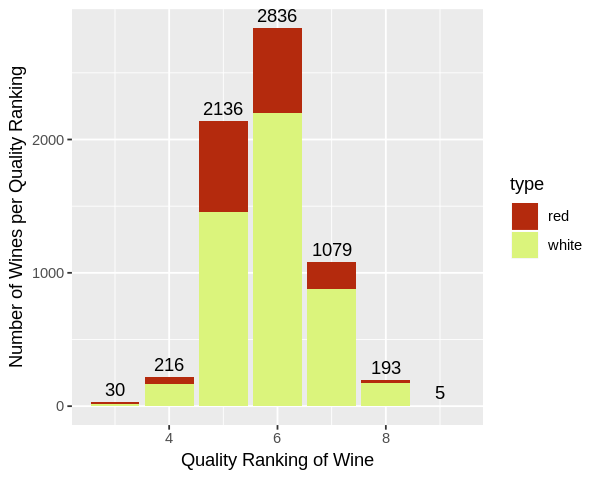

In [5]:
options(repr.plot.width=5,repr.plot.height=4)

quality_distribution <- ggplot(wine, aes(x = quality)) +
    xlab("Quality Ranking of Wine") +
    ylab("Number of Wines per Quality Ranking") +
    geom_bar(stat="count", aes(fill = type)) + scale_fill_manual(values=c("#B42A0D", "#DBF47C")) +
    geom_text(stat='count', aes(label=..count..), vjust=-(1/2))
quality_distribution

*Figure 1: Bar chart showing count of wine observations to quality ranking.*

## 1.5 Scaling The Data
Before making the analysis, we make sure that our quantitative variables are scaled as we use KNN regression, this will help reduce bias and skewed results that we get from some variables form of measurement being on a greater scale than others.

In [6]:
scaled_wine <- wine %>%
  mutate(fixed_acidity = as.numeric(scale(fixed_acidity, center = FALSE)),
         volatile_acidity = as.numeric(scale(volatile_acidity, center = FALSE)),
         citric_acid = as.numeric(scale(citric_acid, center = FALSE)),
         residual_sugar = as.numeric(scale(residual_sugar, center = FALSE)),
         chlorides = as.numeric(scale(chlorides, center = FALSE)),
         free_sulfur_dioxide = as.numeric(scale(free_sulfur_dioxide, center = FALSE)),
         total_sulfur_dioxide = as.numeric(scale(total_sulfur_dioxide, center = FALSE)),
         density = as.numeric(scale(density, center = FALSE)),
         pH = as.numeric(scale(pH, center = FALSE)),
         sulphates = as.numeric(scale(sulphates, center = FALSE)),
         alcohol = as.numeric(scale(alcohol, center = FALSE)),
         volatile_acidity = as.numeric(scale(volatile_acidity, center = FALSE)),
         volatile_acidity = as.numeric(scale(volatile_acidity, center = FALSE)),
        )
glimpse(scaled_wine)

Observations: 6,495
Variables: 13
$ type                 <chr> "white", "white", "white", "white", "white", "...
$ fixed_acidity        <dbl> 0.9547694, 0.8592925, 1.1048046, 0.9820486, 0....
$ volatile_acidity     <dbl> 0.7154544, 0.7949494, 0.7419527, 0.6094612, 0....
$ citric_acid          <dbl> 1.0277420, 0.9706452, 1.1419355, 0.9135484, 0....
$ residual_sugar       <dbl> 2.8628632, 0.2212841, 0.9542877, 1.1755718, 1....
$ chlorides            <dbl> 0.6810126, 0.7415471, 0.7566807, 0.8777496, 0....
$ free_sulfur_dioxide  <dbl> 1.2745458, 0.3965254, 0.8496972, 1.3311923, 1....
$ total_sulfur_dioxide <dbl> 1.3195811, 1.0246159, 0.7529375, 1.4437770, 1....
$ density              <dbl> 1.0062552, 0.9992185, 1.0003242, 1.0008269, 1....
$ pH                   <dbl> 0.9308765, 1.0239642, 1.0115525, 0.9898320, 0....
$ sulphates            <dbl> 0.8155386, 0.8880309, 0.7974155, 0.7249232, 0....
$ alcohol              <dbl> 0.8332947, 0.8995795, 0.9563950, 0.9374565, 0....
$ quality         

$$- - -$$

# 2 - Data Observations

## 2.1 Exploratory Analysis
For our exploratory analysis we use `ggcorr` to plot all the variables of our wine to get an idea on what variables may be important to consider. We consider the charts as well as the correlation values with are further looked upon by looking at the `ggcorr` heat map.

In [7]:
ggpair_plot <- ggpairs(scaled_wine, mapping = aes(color = type, alpha=1/10), columns = 2:13)
correlations <- ggcorr(scaled_wine, label = TRUE, label_round = 2, nbreaks = 5)

Warning message in ggcorr(scaled_wine, label = TRUE, label_round = 2, nbreaks = 5):
“data in column(s) 'type' are not numeric and were ignored”

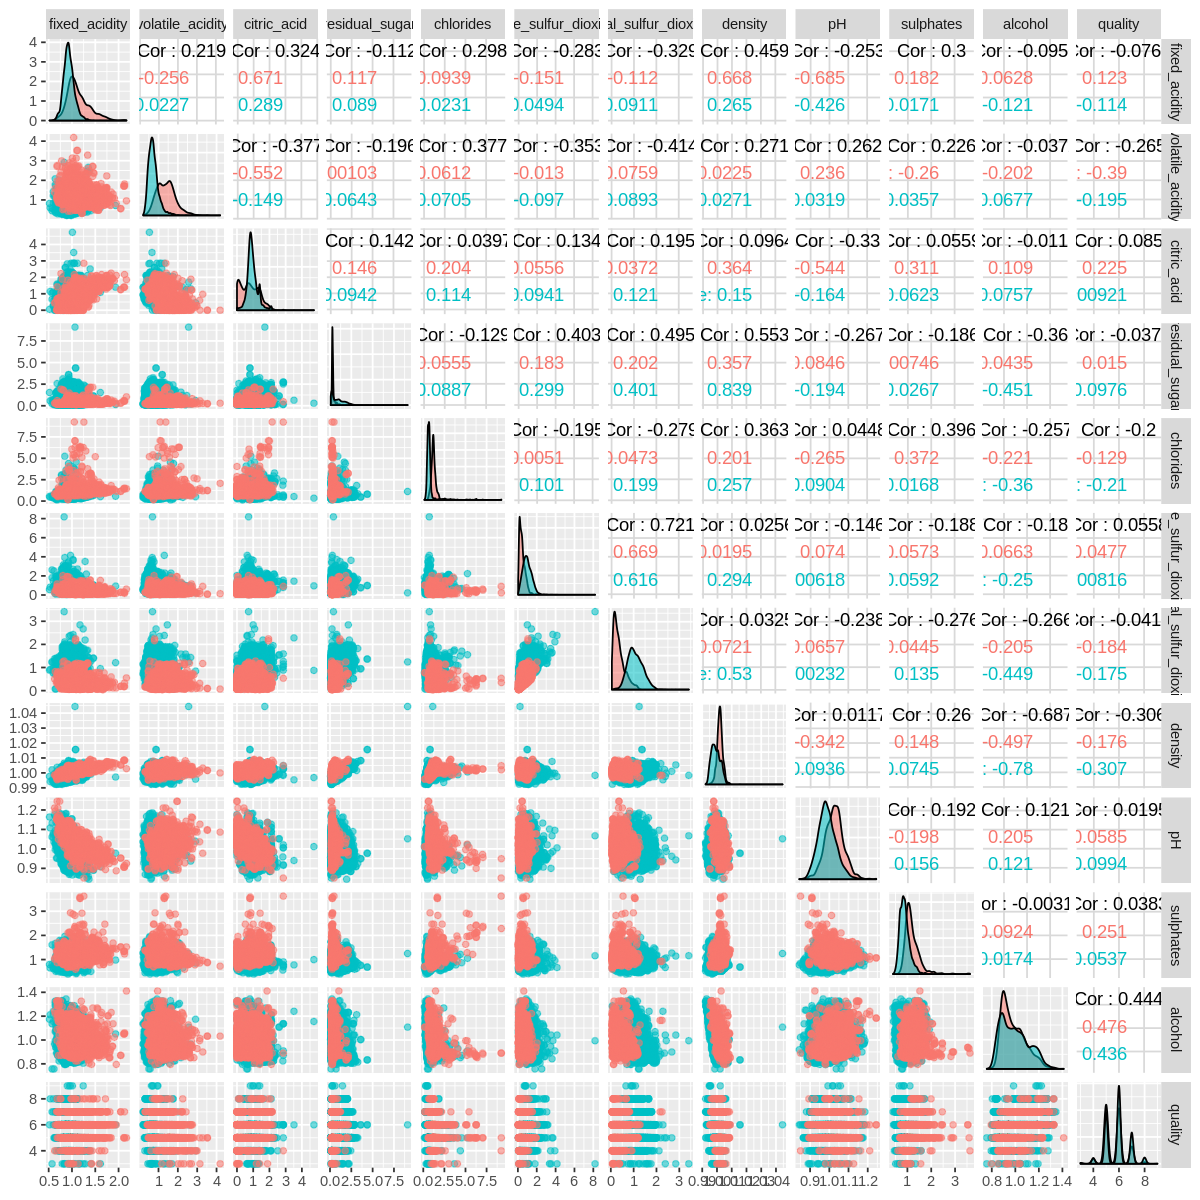

In [8]:
options(repr.plot.width=10,repr.plot.height=10)
ggpair_plot

*Figure 2: ggpairs plot of each variable plotted against each other.*

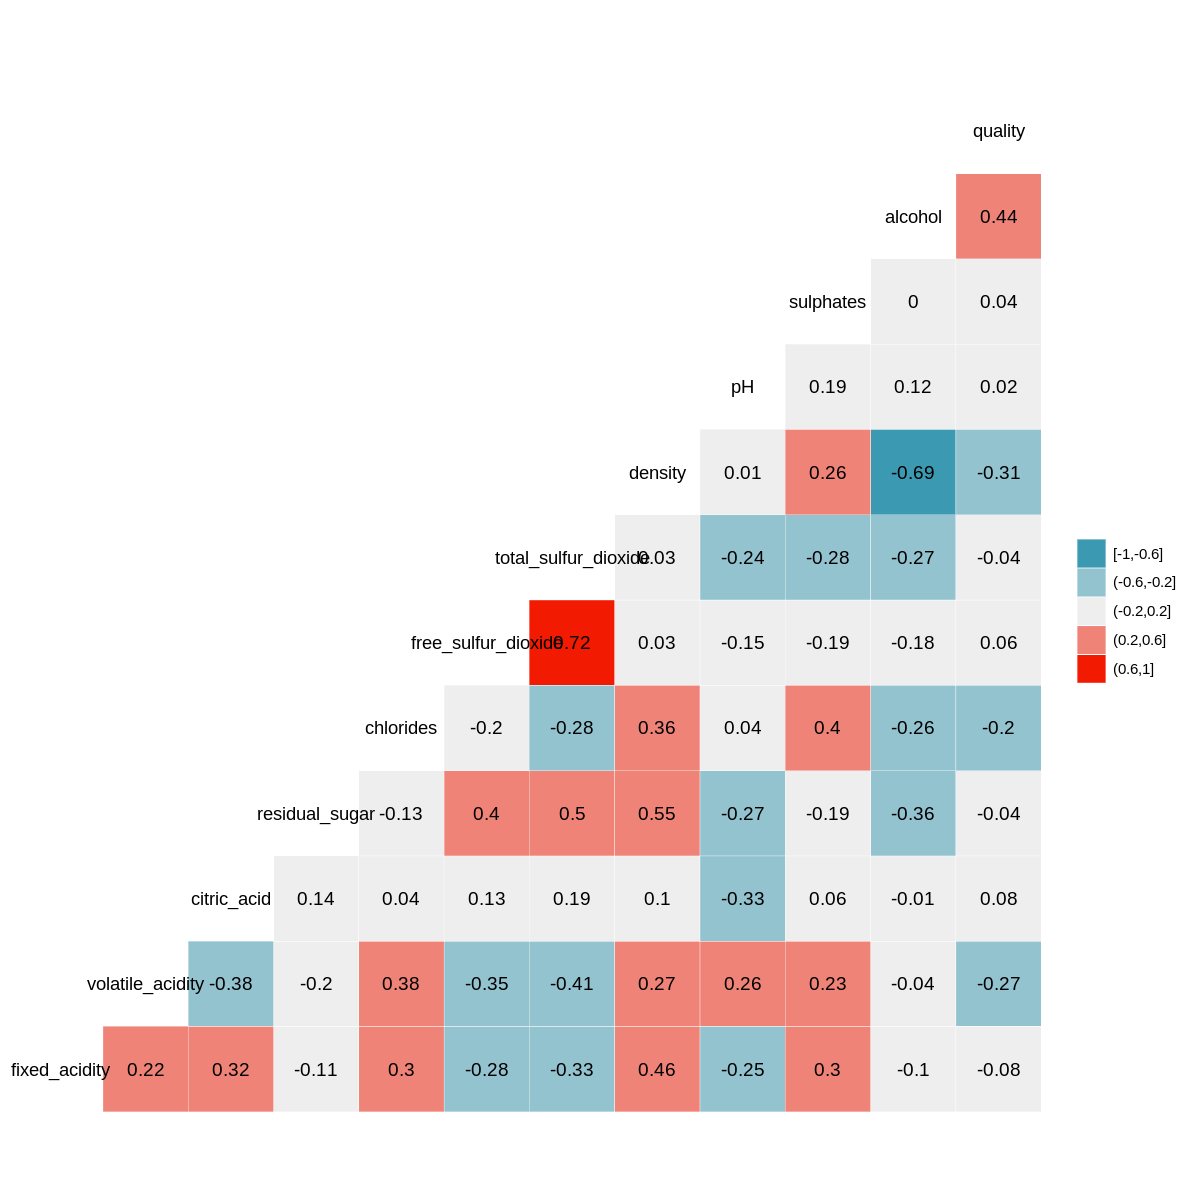

In [9]:
options(repr.plot.width=10,repr.plot.height=10)
correlations

*Figure 3: Chart showing the correlation of each variable against eachother. We are most interested in how each variable affects quality.*

## 2.2 Initial Observations

From the visualization above, we observe in the last column of figure 3 (under quality), 4 variables that have a strong correlation (either positive or negative) to the quality of wine. 

These four are

 * `alcohol` with a positive correlation of $0.44$
 * `density` with a negative correlation of $-0.31$
 * `chlorides` with a negative correlation of $-0.20$
 * `volatile_acidity` with a negative correlation of $-0.27$
 
For `alcohol` this suggests that the more alcohol there is, the better the wine is. For the other variables with negative correlations to quality, `density`, `chlorides`, and `volatile_acidity`, this suggests that these all should be low for the quality of the wine to be good. 

We continue with all variables as we do not know yet if those 4 really are the best indicators for a good quality wine. For a different visualization, the plots below show each of the variables vs. quality to see if there are any trends that could not be expressed through the correlation. We plot every variable against quality with an overlaid `geom_smooth(method = "loess")` line, to give an idea of what to expect when we do KNN regression on each variable. By using `scale_x_log10()` we have scaled the x-axis on a logarithmic scale making the trends in the data easier to visualize. 

Warning message:
“Removed 3 rows containing missing values (geom_point).”Warning message:
“Transformation introduced infinite values in continuous x-axis”Warning message:
“Transformation introduced infinite values in continuous x-axis”

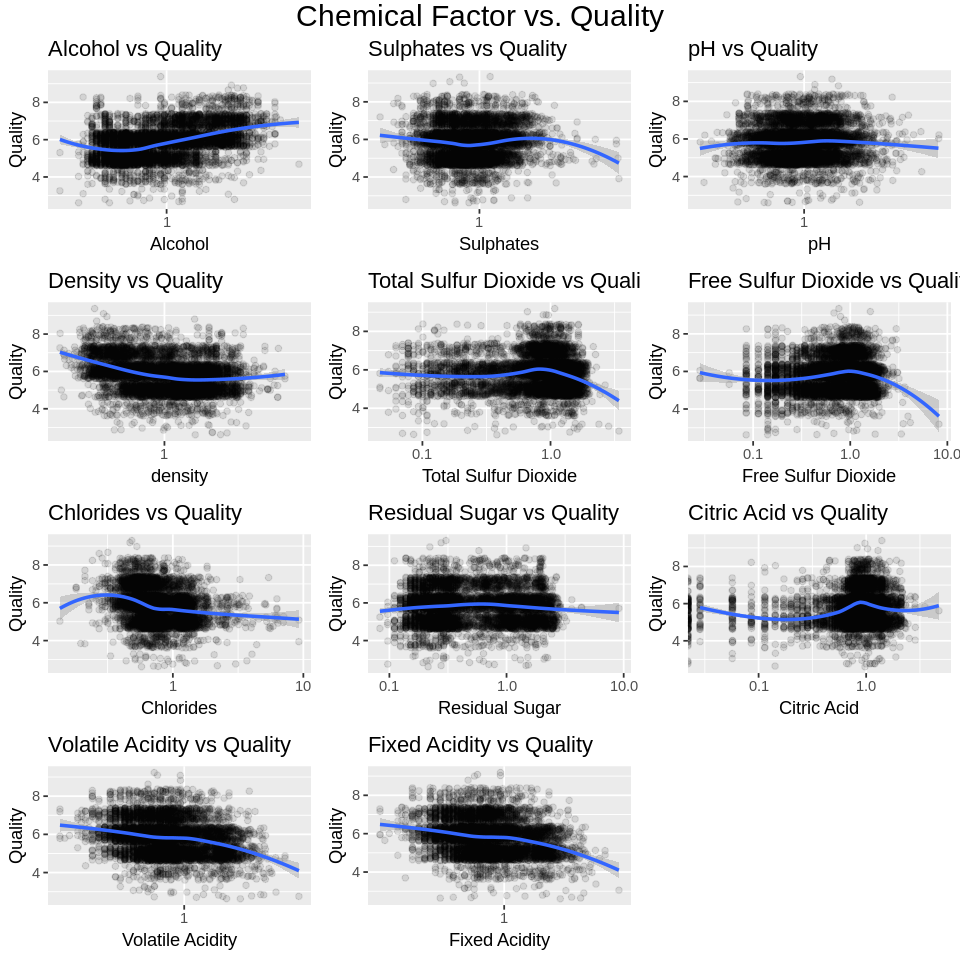

In [10]:
# The loess smoothing method appears to be in line with k-nn regression we are trying to do. It's what I have picked
# for smoothing lines in the charts for now, but will also do the typical k-nn calculations..
# https://blogs.sas.com/content/iml/2016/10/17/what-is-loess-regression.html


options(repr.plot.width=8,repr.plot.height=8)

alcohol_plot <- ggplot(scaled_wine, aes(x = alcohol, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Alcohol") + 
    ylab("Quality") +
    ggtitle("Alcohol vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

sulphates_plot <- ggplot(scaled_wine, aes(x = sulphates, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Sulphates") + 
    ylab("Quality") +
    ggtitle("Sulphates vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

pH_plot <- ggplot(scaled_wine, aes(x = pH, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("pH") + 
    ylab("Quality") +
    ggtitle("pH vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

density_plot <- ggplot(scaled_wine, aes(x = density, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("density") + 
    ylab("Quality") +
    ggtitle("Density vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10(limits=c(NA, 1.01))

total_sulfur_dioxide_plot <- ggplot(scaled_wine, aes(x = total_sulfur_dioxide, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Total Sulfur Dioxide") + 
    ylab("Quality") +
    ggtitle("Total Sulfur Dioxide vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

free_sulfur_dioxide_plot <- ggplot(scaled_wine, aes(x = free_sulfur_dioxide, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Free Sulfur Dioxide") + 
    ylab("Quality") +
    ggtitle("Free Sulfur Dioxide vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

chlorides_plot <- ggplot(scaled_wine, aes(x = chlorides, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Chlorides") + 
    ylab("Quality") +
    ggtitle("Chlorides vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

residual_sugar_plot <- ggplot(scaled_wine, aes(x = residual_sugar, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Residual Sugar") + 
    ylab("Quality") +
    ggtitle("Residual Sugar vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

citric_acid_plot <- ggplot(scaled_wine, aes(x = citric_acid, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Citric Acid") + 
    ylab("Quality") +
    ggtitle("Citric Acid vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

volatile_acidity_plot <- ggplot(scaled_wine, aes(x = volatile_acidity, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Volatile Acidity") + 
    ylab("Quality") +
    ggtitle("Volatile Acidity vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

fixed_acidity_plot <- ggplot(scaled_wine, aes(x = volatile_acidity, y = quality)) + 
    geom_point(alpha=0.1,position = "jitter") +
    xlab("Fixed Acidity") + 
    ylab("Quality") +
    ggtitle("Fixed Acidity vs Quality") +
    geom_smooth(method = "loess", na.rm = TRUE) +
    scale_x_log10()

grid.arrange(alcohol_plot, sulphates_plot, pH_plot, density_plot,
             total_sulfur_dioxide_plot, free_sulfur_dioxide_plot, chlorides_plot,
             residual_sugar_plot, citric_acid_plot, volatile_acidity_plot, fixed_acidity_plot,
             top=textGrob("Chemical Factor vs. Quality", gp=gpar(fontsize=18)))

*Figure 4: Each variable plotted against quality with overlaid loess regression line to give a preview of what to expect with k-nn regression, x-axis is logarithmically scaled to reduce chart clustering and more clearly show relationship to quality.*

## 2.3 Goals of Analysis

At first glance from our exploratory analysis, we find `alcohol` to be a significant determinant of quality by its high correlation value and plot. `volatile_acididty`, `chlorides`, and `density` also have high negative correlation values and their charts show promising signs of a relationship between increased levels and lower wine quality. 

Through this analysis we hope to **find what the top chemical factors are responsible for differentiating the quality of wine** with the prediction that alcohol, volatile acidity, clorides, and density being major indicators. 

$$- - -$$

# 3 - Regression Analysis
For our analysis, we preform k-Nearest Neighbours regression. In that, we create a model and then calculate the test $RMSE$ for each variable against quality to see which has the smallest error. The variable with the smallest test $RMSE$ is then assumed to give a good indication that it has an influence over the wine quality. 

We then further our analysis and do a multi-variable and all-variable k-Nearest Neighbours regression where we combine multiple variables to see if we can create a model that is better than any individual variable alone.

### 3.1 Creating the Training and Testing Datasets

We begin the K-NN regression by setting the seed `set.seed(1234)` to make the random selection of rows reproducible (and consistent). We then split our scaled data `scaled_wine` to create training and testing datasets using 75% of the data as training data. 

In [11]:
set.seed(1234)
training_rows <- scaled_wine %>% 
  select(quality) %>% 
  unlist() %>%
  createDataPartition(p = 0.75, list = FALSE)

# Creating X & Y trains for each single variable.

# Y Train (Quality) remains same for all variables
Y_train <- scaled_wine %>%
  select(quality) %>%
  slice(training_rows) %>%
  unlist()

Y_test <- scaled_wine %>% 
  select(quality) %>% 
  slice(-training_rows) %>% 
  unlist()

# X_Train alcohol
X_train_alcohol <- scaled_wine %>% 
  select(alcohol) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_alcohol <- scaled_wine %>% 
  select(alcohol) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train sulphates
X_train_sulphates <- scaled_wine %>% 
  select(sulphates) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_sulphates <- scaled_wine %>% 
  select(sulphates) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train pH
X_train_pH <- scaled_wine %>% 
  select(pH) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_pH <- scaled_wine %>% 
  select(pH) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train density
X_train_density <- scaled_wine %>% 
  select(density) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_density <- scaled_wine %>% 
  select(density) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train total_sulfur_dioxide
X_train_total_sulfur_dioxide <- scaled_wine %>% 
  select(total_sulfur_dioxide) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_total_sulfur_dioxide <- scaled_wine %>% 
  select(total_sulfur_dioxide) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train free_sulfur_dioxide
X_train_free_sulfur_dioxide <- scaled_wine %>% 
  select(free_sulfur_dioxide) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_free_sulfur_dioxide <- scaled_wine %>% 
  select(free_sulfur_dioxide) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train chlorides
X_train_chlorides <- scaled_wine %>% 
  select(chlorides) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_chlorides <- scaled_wine %>% 
  select(chlorides) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train residual_sugar
X_train_residual_sugar <- scaled_wine %>% 
  select(residual_sugar) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_residual_sugar <- scaled_wine %>% 
  select(residual_sugar) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train citric_acid
X_train_citric_acid <- scaled_wine %>% 
  select(citric_acid) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_citric_acid <- scaled_wine %>% 
  select(citric_acid) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train volatile_acidity
X_train_volatile_acidity <- scaled_wine %>% 
  select(volatile_acidity) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_volatile_acidity <- scaled_wine %>% 
  select(volatile_acidity) %>%
  slice(-training_rows) %>% 
  data.frame()

# X_Train fixed_acidity
X_train_fixed_acidity <- scaled_wine %>% 
  select(fixed_acidity) %>% 
  slice(training_rows) %>% 
  data.frame()

X_test_fixed_acidity <- scaled_wine %>% 
  select(fixed_acidity) %>%
  slice(-training_rows) %>% 
  data.frame()

## 3.2 Modelling Individual Variables

With the training datasets that were just created, we find the best $k$ for each variable individually through 10-fold cross validation and then create KNN regression models for each variable with the $k$ that results in the lowest $RMSE$.


<i> the next code cell takes a long time to run &#127939; between 15-20 minutes</i>

This video <a href="https://www.youtube.com/embed/Bxd-pfQzQuw">here</a> gives a brief history on Vinho Verde wine on YouTube, the wine the whole data set and project is about, and is 1 minute and 34 seconds (which is still much faster than the next code cell)

In [12]:
train_control <- trainControl(method = "cv", number = 10)
k_lots = data.frame(k = seq(from = 1, to = 251, by = 10)) 

# alcohol model
        # cross-validation step
knn_cv_alcohol <- train(x = X_train_alcohol, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_alcohol <- knn_cv_alcohol$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_alcohol = data.frame(k = best_k_alcohol)
        # final model
knn_alcohol_final <- train(x = X_train_alcohol, y = Y_train, method = "knn", tuneGrid = k_alcohol)
        # testing our model
test_pred_alcohol <- predict(knn_alcohol_final, X_test_alcohol)
modelvalues_alcohol <- data.frame(obs = Y_test, pred = test_pred_alcohol)
test_results_alcohol <- defaultSummary(modelvalues_alcohol)



# sulphates model
        # cross-validation step
knn_cv_sulphates <- train(x = X_train_sulphates, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_sulphates <- knn_cv_sulphates$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_sulphates = data.frame(k = best_k_sulphates)
        # final model
knn_sulphates_final <- train(x = X_train_sulphates, y = Y_train, method = "knn", tuneGrid = k_sulphates)
        # testing our model
test_pred_sulphates <- predict(knn_sulphates_final, X_test_sulphates)
modelvalues_sulphates <- data.frame(obs = Y_test, pred = test_pred_sulphates)
test_results_sulphates <- defaultSummary(modelvalues_sulphates)


# pH model
        # cross-validation step
knn_cv_pH <- train(x = X_train_pH, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_pH <- knn_cv_pH$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_pH = data.frame(k = best_k_pH)
        # final model
knn_pH_final <- train(x = X_train_pH, y = Y_train, method = "knn", tuneGrid = k_pH)
        # testing our model
test_pred_pH <- predict(knn_pH_final, X_test_pH)
modelvalues_pH <- data.frame(obs = Y_test, pred = test_pred_pH)
test_results_pH <- defaultSummary(modelvalues_pH)


# density model
        # cross-validation step
knn_cv_density <- train(x = X_train_density, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_density <- knn_cv_density$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_density = data.frame(k = best_k_density)
        # final model
knn_density_final <- train(x = X_train_density, y = Y_train, method = "knn", tuneGrid = k_density)
        # testing our model
test_pred_density <- predict(knn_density_final, X_test_density)
modelvalues_density <- data.frame(obs = Y_test, pred = test_pred_density)
test_results_density <- defaultSummary(modelvalues_density)


# total_sulfur_dioxide model
        # cross-validation step
knn_cv_total_sulfur_dioxide <- train(x = X_train_total_sulfur_dioxide, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_total_sulfur_dioxide <- knn_cv_total_sulfur_dioxide$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_total_sulfur_dioxide = data.frame(k = best_k_total_sulfur_dioxide)
        # final model
knn_total_sulfur_dioxide_final <- train(x = X_train_total_sulfur_dioxide, y = Y_train, method = "knn", tuneGrid = k_total_sulfur_dioxide)
        # testing our model
test_pred_total_sulfur_dioxide <- predict(knn_total_sulfur_dioxide_final, X_test_total_sulfur_dioxide)
modelvalues_total_sulfur_dioxide <- data.frame(obs = Y_test, pred = test_pred_total_sulfur_dioxide)
test_results_total_sulfur_dioxide <- defaultSummary(modelvalues_total_sulfur_dioxide)


# free_sulfur_dioxide model
        # cross-validation step
knn_cv_free_sulfur_dioxide <- train(x = X_train_free_sulfur_dioxide, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_free_sulfur_dioxide <- knn_cv_free_sulfur_dioxide$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_free_sulfur_dioxide = data.frame(k = best_k_free_sulfur_dioxide)
        # final model
knn_free_sulfur_dioxide_final <- train(x = X_train_free_sulfur_dioxide, y = Y_train, method = "knn", tuneGrid = k_free_sulfur_dioxide)
        # testing our model
test_pred_free_sulfur_dioxide <- predict(knn_free_sulfur_dioxide_final, X_test_free_sulfur_dioxide)
modelvalues_free_sulfur_dioxide <- data.frame(obs = Y_test, pred = test_pred_free_sulfur_dioxide)
test_results_free_sulfur_dioxide <- defaultSummary(modelvalues_free_sulfur_dioxide)


# chlorides model
        # cross-validation step
knn_cv_chlorides <- train(x = X_train_chlorides, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_chlorides <- knn_cv_chlorides$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_chlorides = data.frame(k = best_k_chlorides)
        # final model
knn_chlorides_final <- train(x = X_train_chlorides, y = Y_train, method = "knn", tuneGrid = k_chlorides)
        # testing our model
test_pred_chlorides <- predict(knn_chlorides_final, X_test_chlorides)
modelvalues_chlorides <- data.frame(obs = Y_test, pred = test_pred_chlorides)
test_results_chlorides <- defaultSummary(modelvalues_chlorides)


# residual_sugar model
        # cross-validation step
knn_cv_residual_sugar <- train(x = X_train_residual_sugar, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_residual_sugar <- knn_cv_residual_sugar$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_residual_sugar = data.frame(k = best_k_residual_sugar)
        # final model
knn_residual_sugar_final <- train(x = X_train_residual_sugar, y = Y_train, method = "knn", tuneGrid = k_residual_sugar)
        # testing our model
test_pred_residual_sugar <- predict(knn_residual_sugar_final, X_test_residual_sugar)
modelvalues_residual_sugar <- data.frame(obs = Y_test, pred = test_pred_residual_sugar)
test_results_residual_sugar <- defaultSummary(modelvalues_residual_sugar)


# citric_acid model
        # cross-validation step
knn_cv_citric_acid <- train(x = X_train_citric_acid, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_citric_acid <- knn_cv_citric_acid$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_citric_acid = data.frame(k = best_k_citric_acid)
        # final model
knn_citric_acid_final <- train(x = X_train_citric_acid, y = Y_train, method = "knn", tuneGrid = k_citric_acid)
        # testing our model
test_pred_citric_acid <- predict(knn_citric_acid_final, X_test_citric_acid)
modelvalues_citric_acid <- data.frame(obs = Y_test, pred = test_pred_citric_acid)
test_results_citric_acid <- defaultSummary(modelvalues_citric_acid)


# volatile_acidity model
        # cross-validation step
knn_cv_volatile_acidity <- train(x = X_train_volatile_acidity, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_volatile_acidity <- knn_cv_volatile_acidity$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_volatile_acidity = data.frame(k = best_k_volatile_acidity)
        # final model
knn_volatile_acidity_final <- train(x = X_train_volatile_acidity, y = Y_train, method = "knn", tuneGrid = k_volatile_acidity)
        # testing our model
test_pred_volatile_acidity <- predict(knn_volatile_acidity_final, X_test_volatile_acidity)
modelvalues_volatile_acidity <- data.frame(obs = Y_test, pred = test_pred_volatile_acidity)
test_results_volatile_acidity <- defaultSummary(modelvalues_volatile_acidity)


# fixed_acidity model
        # cross-validation step
knn_cv_fixed_acidity <- train(x = X_train_fixed_acidity, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_fixed_acidity <- knn_cv_fixed_acidity$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_fixed_acidity = data.frame(k = best_k_fixed_acidity)
        # final model
knn_fixed_acidity_final <- train(x = X_train_fixed_acidity, y = Y_train, method = "knn", tuneGrid = k_fixed_acidity)
        # testing our model
test_pred_fixed_acidity <- predict(knn_fixed_acidity_final, X_test_fixed_acidity)
modelvalues_fixed_acidity <- data.frame(obs = Y_test, pred = test_pred_fixed_acidity)
test_results_fixed_acidity <- defaultSummary(modelvalues_fixed_acidity)


## 3.3 Individual Variable Analysis

Now that we trained and tested these models, we can find the test $RMSE$ of each of them to find the variables with the smallest error and with that, find the best indicator for wine quality alone.

In [13]:
variable <- c("alcohol","sulphates","pH","density","total_sulfur_dioxide","free_sulfur_dioxide",
             "chlorides","residual_sugar","citric_acid","volatile_acidity","fixed_acidity")

test_results_volatile_acidity <- defaultSummary(modelvalues_volatile_acidity)

RMSE <- c(test_results_alcohol[["RMSE"]],
          test_results_sulphates[["RMSE"]],
          test_results_pH[["RMSE"]],
          test_results_density[["RMSE"]],
          test_results_total_sulfur_dioxide[["RMSE"]],
          test_results_free_sulfur_dioxide[["RMSE"]],
          test_results_chlorides[["RMSE"]],
          test_results_residual_sugar[["RMSE"]],
          test_results_citric_acid[["RMSE"]],
          test_results_volatile_acidity[["RMSE"]],
          test_results_fixed_acidity[["RMSE"]])
RMSE <- round(RMSE, 3)

knn_sv_RMSE <- data.frame(variable, RMSE) %>%
               arrange(RMSE)

knn_sv_RMSE

variable,RMSE
alcohol,0.769
density,0.812
chlorides,0.822
citric_acid,0.834
total_sulfur_dioxide,0.837
volatile_acidity,0.837
free_sulfur_dioxide,0.852
fixed_acidity,0.855
pH,0.861
sulphates,0.862


*Figure 5: Table of each variable ordered by size of test RMSE*

We found alcohol to have the smallest test $RMSE$ of any of the variables at $0.769$, followed by density with the next smallest $RMSE$ at $0.814$, followed by chlorides at $0.822$. These first three variables are in line with our exploratory analysis that predicted these variables to be significant factors that affect wine quality. We then find two new significant variables: citric acid at $0.835$ and total sulfur dioxide tied with our fourth originally predicted variable: volatile acidity at $0.837$.

## 3.4 Multiple Variable Modelling
Next, we will create a K-NN regression model with the significant variables we found that have an $RMSE \leq 0.837$: `alcohol`, `density`, `chlorides`, `citric_acid`, `total_sulfur_dioxide`, and `volatile_acidity`, to see if it can predict better when combined. We then split our scaled data `scaled_wine` to create training and testing datasets using 75% of the data as training data. 

<i> this takes around 1 minute</i>

In [14]:
set.seed(1234)
training_rows <- scaled_wine %>% 
  select(quality) %>% 
  unlist() %>%
  createDataPartition(p = 0.75, list = FALSE)

train_control <- trainControl(method = "cv", number = 10)
k_lots = data.frame(k = seq(from = 1, to = 251, by = 10))

X_train <- scaled_wine %>% 
  select(alcohol, density, chlorides, citric_acid, total_sulfur_dioxide, volatile_acidity) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train <- scaled_wine %>%
  select(quality) %>%
  slice(training_rows) %>%
  unlist()

X_test <- scaled_wine %>% 
  select(alcohol, density, chlorides, citric_acid, total_sulfur_dioxide, volatile_acidity) %>%
  slice(-training_rows) %>% 
  data.frame()

Y_test <- scaled_wine %>% 
  select(quality) %>% 
  slice(-training_rows) %>% 
  unlist()

# multiple variable model
        # cross-validation step
knn_cv_multiple <- train(x = X_train, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_multiple <- knn_cv_multiple$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_multiple = data.frame(k = best_k_multiple)
        # final model
knn_multiple_final <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_multiple)
        # testing our model
test_pred_multiple <- predict(knn_multiple_final, X_test)
modelvalues_multiple <- data.frame(obs = Y_test, pred = test_pred_multiple)
test_results_multiple <- defaultSummary(modelvalues_multiple)


#### RMSE for the Multiple Variable Model
We can find the test $RMSE$ of the multiple variable model which uses `alcohol`, `density`, `chlorides`, `citric_acid`, `total_sulfur_dioxide` and `volatile_acidity` to predict the quality of the wine. 

In [15]:
variable <- c("alcohol, density, chlorides, citric_acid, total_sulfur_dioxide, volatile_acidity")
RMSE <- c(test_results_multiple[["RMSE"]])
RMSE <- round(RMSE, 3)

knn_mv_RMSE <- data.frame(variable, RMSE) %>%
               arrange(RMSE)
knn_mv_RMSE

variable,RMSE
"alcohol, density, chlorides, citric_acid, total_sulfur_dioxide, volatile_acidity",0.733


*Figure 6: Test RMSE result of the multiple variable model*

## 3.5 Model Comparison 1
Combining these variables appears to have strengthened the accuracy of our model, as the test $RMSE$ of the Multiple Variable Model is lower than that of each variable individually. This further suggests that these six variables, `alcohol`, `density`, `chlorides`, `citric_acid`, `total_sulfur_dioxide` and `volatile_acidity` are important for determining the quality of wine. 

In [16]:
RMSE_chart <- rbind(knn_sv_RMSE, knn_mv_RMSE) %>%
            arrange(RMSE)
RMSE_chart

variable,RMSE
"alcohol, density, chlorides, citric_acid, total_sulfur_dioxide, volatile_acidity",0.733
alcohol,0.769
density,0.812
chlorides,0.822
citric_acid,0.834
total_sulfur_dioxide,0.837
volatile_acidity,0.837
free_sulfur_dioxide,0.852
fixed_acidity,0.855
pH,0.861


*Figure 7: Table of each model test RMSE result, with the multiple variable model having the lowest test error out of all the models shown*

## 3.6 All Variable Modelling
As increasing the number of predictors decreased the test $RMSE$ of our model, we now see if using all variables will decrease it even more. We create K-NN regression model with all the variables to see if it can predict better the the 6-variable model (alcohol, density, chlorides, citric acid, total sulfur dioxide, and volatile acidity) and better than all variables individually. We split our scaled data `scaled_wine` to create training and testing datasets using 75% of the data as training data.

In [17]:
training_rows <- scaled_wine %>% 
  select(quality) %>% 
  unlist() %>%
  createDataPartition(p = 0.75, list = FALSE)

X_train <- scaled_wine %>% 
  select(-quality,-type) %>% 
  slice(training_rows) %>% 
  data.frame()

Y_train <- scaled_wine %>%
  select(quality) %>%
  slice(training_rows) %>%
  unlist()

X_test <- scaled_wine %>% 
  select(-quality,-type) %>%
  slice(-training_rows) %>% 
  data.frame()

Y_test <- scaled_wine %>% 
  select(quality) %>% 
  slice(-training_rows) %>% 
  unlist()


train_control <- trainControl(method = "cv", number = 10)
k_lots = data.frame(k = seq(from = 1, to = 251, by = 10))

# multiple variable model
        # cross-validation step
knn_cv_all <- train(x = X_train, 
                        y = Y_train,
                        method = "knn", tuneGrid = k_lots, trControl = train_control)
        # finding the lowest k
best_k_all <- knn_cv_all$results %>% filter(RMSE == min(RMSE)) %>% select(k) %>% unlist()
k_all = data.frame(k = best_k_all)
        # final model
knn_all_final <- train(x = X_train, y = Y_train, method = "knn", tuneGrid = k_all)
        # testing our model
test_pred_all <- predict(knn_all_final, X_test)
modelvalues_all <- data.frame(obs = Y_test, pred = test_pred_all)
test_results_all <- defaultSummary(modelvalues_all)

We can find the test $RMSE$ of the model using all variables to predict the quality of the wine. 

In [18]:
variable <- c("all variables")
RMSE <- c(test_results_all[["RMSE"]])
RMSE <- round(RMSE, 3)

knn_all_RMSE <- data.frame(variable, RMSE) %>%
               arrange(RMSE)
knn_all_RMSE

variable,RMSE
all variables,0.716


*Figure 8: Test RMSE result of the all variable model*

## 3.7 Model Comparison 2
The combination of all variables appears to have strengthened the accuracy of our model even more as the test $RMSE$ of the All Variable Model is lower than that of each variable individually, and of the Multiple Variable Model for `alcohol`, `density`, `chlorides`, `citric_acid`, `total_sulfur_dioxide` and `volatile_acidity`. 

In [19]:
RMSE_chart_updated <- rbind(knn_sv_RMSE, knn_mv_RMSE, knn_all_RMSE) %>%
            arrange(RMSE)
RMSE_chart_updated

variable,RMSE
all variables,0.716
"alcohol, density, chlorides, citric_acid, total_sulfur_dioxide, volatile_acidity",0.733
alcohol,0.769
density,0.812
chlorides,0.822
citric_acid,0.834
total_sulfur_dioxide,0.837
volatile_acidity,0.837
free_sulfur_dioxide,0.852
fixed_acidity,0.855


*Figure 9: Table of each model test RMSE result, with the all variable model having the lowest test error out of all the models shown*

$$- - -$$

# 4 - Discussion

## 4.1 Summary of Findings
Through our k-nn regression analysis of the Wine Data Set we found that the different variables have different impacts on the quality of wine. Although using all the variables to predict the quality of wine results in the smallest error, it is better than relying on one variable alone. Also when we combined the top (4) variables that individually had the lowest error it was also better than all the variables individually. These top four most important factors, by the lowest individual $RMSE$, that suggest a good quality Vinho Verde are: alcohol, density, chlorides, citric acid. From this and from looking at the correlation plot again, we deduce that:

A good quality Vinho Verde has 
* High alcohol
* Low Density
* Low chlorides
* A balanced amount of citric acid. 

These findings are partially what we expected to find, with our original four predicted variables having a low testing $RMSE$: alcohol, density, chlorides, and volatile acidity. We also discovered another factor that had a significant impact on our model: citric acid. 

## 4.2 Impact of Findings
With these findings we are able to pick higher quality wine without drinking it! These results also give us an idea on what makes the quality better which can help choosing a wine at the liqour store (in there selection of maximum 3 Vinho Verdes). 

Other than that, these findings could help food chemists and wine producers understand what goes into a good quality wine from Portugal. They could then use use that knowledge to improve upon factors of wine production such as choosing processing techniques, storage techniques, and distribution methods.

Also, as citric acid was not read off the correlation plot but had a low $RMSE$, we are able to observe the importance of the analysis and KNN regression. 

## 4.3 Future Questions
* Are the factors that result in higher wine quality in Vinho Verde the same as in other wine types, and in wine from other regions?
* Is it possible to create a Vinho Verde with quality 10 by adjusting the chemical factors to align with the trends found? 

![](https://anetours.pt/wp-content/uploads/2018/02/vinhoverde-600x450.jpg)
<center><i>Source: https://anetours.pt/wp-content/uploads/2018/02/vinhoverde-600x450.jpg</i></center>

$$- - -$$

# 5 - References

## 5.1 Code References

Timbers, Tiffany Anne, et al. Introduction to Data Science. 2019.
https://ubc-dsci.github.io/introduction-to-datascience/

“How to Add Frequency Count Labels to the Bars in a Bar Graph Using ggplot2?” Stack Overflow, https://stackoverflow.com/questions/26553526/how-to-add-frequency-count-labels-to-the-bars-in-a-bar-graph-using-ggplot2/26556180

“Ggpairs Plot with Heatmap of Correlation Values.” Stack Overflow, https://stackoverflow.com/questions/45873483/ggpairs-plot-with-heatmap-of-correlation-values

Wicklin, Rick. “What Is Loess Regression?” The DO Loop, 17 Oct. 2016, https://blogs.sas.com/content/iml/2016/10/17/what-is-loess-regression.html



## 5.2 Wine Chemistry References

[Density](https://www.etslabs.com/analyses/DEN), [Volatile Acidity](https://www.decanter.com/learn/volatile-acidity-va-45532/#YkqhH608X7wB4jZb.99), [Free Sulfur Dioxide](https://www.laboratoire-obst.com/so2-libre-en.html), [Total Sulfur Dioxide](https://www.laboratoire-obst.com/so2-total-en.html), [Fixed Acidity](https://waterhouse.ucdavis.edu/whats-in-wine/fixed-acidity), [Sulfates](phttps://www.healthline.com/health/beauty-skin-care/sulfates).


$$- - -$$